In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
energy = pd.read_csv('/Users/krishisrani/Downloads/energy_data.csv')
weather = pd.read_csv('/Users/krishisrani/Downloads/weather_data.csv')
import datetime

In [187]:
energy.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [188]:
weather.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


In [189]:
weather["time"] = weather["time"].apply(lambda x : datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))


In [190]:
weather["time"]

0       2013-12-31
1       2013-12-31
2       2013-12-31
3       2013-12-31
4       2013-12-31
           ...    
8755    2014-12-31
8756    2014-12-31
8757    2014-12-31
8758    2014-12-31
8759    2014-12-31
Name: time, Length: 8760, dtype: object

In [191]:
new_weather = weather.groupby('time').mean().reset_index()
new_weather

,time,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2013-12-31,18.596000,0.672000,9.986000,1021.028000,4.594000,0.112000,224.400000,0.000000,9.486000,0.000000
1,2014-01-01,20.527917,0.552500,9.708750,1026.902083,6.412500,0.015217,236.416667,0.000000,6.619167,0.000000
2,2014-01-02,13.631250,0.811667,2.281667,1020.227917,9.620833,0.800000,28.041667,0.002688,8.934583,0.098333
3,2014-01-03,4.268333,0.653333,6.310417,1017.960833,10.912917,0.070000,264.250000,0.001346,-5.067083,0.056250
4,2014-01-04,6.788333,0.597500,9.836250,1029.377500,6.027500,0.001667,218.208333,0.000000,-5.176667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
361,2014-12-27,36.614167,0.753750,9.274167,1021.493333,3.879583,0.036250,234.958333,0.000000,29.040833,0.000000
362,2014-12-28,42.235000,0.724167,9.419583,1012.741667,7.886250,0.260455,246.583333,0.003996,33.847917,0.137917
363,2014-12-29,32.868750,0.570833,9.997083,1020.514167,7.505417,0.109583,283.458333,0.000000,18.945000,0.000000
364,2014-12-30,22.754167,0.485000,9.998333,1027.141667,7.106250,0.020000,304.500000,0.000000,5.677917,0.000000


In [192]:
new_weather.rename(columns= {"time":"Date & Time"}, inplace = True)


In [193]:
energy["Date & Time"] = energy["Date & Time"].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
energy


,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2014-12-31,1.560890,0.0,1.560890,0.003226,0.392996,0.006342,0.000872,0.030453,0.002248,0.004817,0.278941,0.000120,0.000292,0.007983,0.033991,0.003702,0.002906
17516,2014-12-31,0.958447,0.0,0.958447,0.000827,0.027369,0.006326,0.000811,0.030391,0.002543,0.004724,0.243128,0.000139,0.000334,0.006178,0.034535,0.004464,0.113162
17517,2014-12-31,0.834462,0.0,0.834462,0.001438,0.170561,0.020708,0.000636,0.012631,0.002372,0.004711,0.204744,0.000087,0.000341,0.005684,0.034484,0.004502,0.051604
17518,2014-12-31,0.543863,0.0,0.543863,0.001164,0.153533,0.008423,0.000553,0.003832,0.002353,0.004736,0.177276,0.000109,0.000373,0.005160,0.025601,0.004647,0.039409


In [194]:
new_energy = energy.groupby('Date & Time').sum().reset_index()
new_energy2 = new_energy[['Date & Time','use [kW]']]

In [195]:
new_energy2

,Date & Time,use [kW]
0,2014-01-01,65.013592
1,2014-01-02,32.305336
2,2014-01-03,31.164468
3,2014-01-04,45.287782
4,2014-01-05,36.316643
...,...,...
360,2014-12-27,35.046127
361,2014-12-28,37.695824
362,2014-12-29,28.675929
363,2014-12-30,31.514313


This is the merged data of weather and energy per day.

In [196]:
result = pd.merge(new_weather,
                 new_energy2,
                 on='Date & Time', 
                 how='inner')

result.rename(columns= {"Date & Time":"Date"}, inplace = True)
result


,Date,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
0,2014-01-01,20.527917,0.552500,9.708750,1026.902083,6.412500,0.015217,236.416667,0.000000,6.619167,0.000000,65.013592
1,2014-01-02,13.631250,0.811667,2.281667,1020.227917,9.620833,0.800000,28.041667,0.002688,8.934583,0.098333,32.305336
2,2014-01-03,4.268333,0.653333,6.310417,1017.960833,10.912917,0.070000,264.250000,0.001346,-5.067083,0.056250,31.164468
3,2014-01-04,6.788333,0.597500,9.836250,1029.377500,6.027500,0.001667,218.208333,0.000000,-5.176667,0.000000,45.287782
4,2014-01-05,20.712083,0.761250,7.480833,1023.551250,2.481667,0.072353,177.333333,0.000721,14.093333,0.030833,36.316643
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,36.614167,0.753750,9.274167,1021.493333,3.879583,0.036250,234.958333,0.000000,29.040833,0.000000,35.046127
361,2014-12-28,42.235000,0.724167,9.419583,1012.741667,7.886250,0.260455,246.583333,0.003996,33.847917,0.137917,37.695824
362,2014-12-29,32.868750,0.570833,9.997083,1020.514167,7.505417,0.109583,283.458333,0.000000,18.945000,0.000000,28.675929
363,2014-12-30,22.754167,0.485000,9.998333,1027.141667,7.106250,0.020000,304.500000,0.000000,5.677917,0.000000,31.514313


In [197]:
date =  '2014-12-01'
mask = (result['Date'] >= date)

Test Data:

In [198]:
test = result.loc[mask]

In [199]:
date =  '2014-12-01'
mask = (result['Date'] < date)

Test Data:

In [200]:
train = result.loc[mask]

In [201]:
see_corr = train.corr(method ='pearson')
see_corr

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
temperature,1.000000,0.372933,0.098271,-0.172175,-0.248046,0.128759,-0.141960,0.132173,0.967669,0.123247,0.372421
humidity,0.372933,1.000000,-0.651470,-0.236012,-0.320444,0.622160,-0.443768,0.495826,0.591651,0.597908,0.108147
visibility,0.098271,-0.651470,1.000000,0.246338,0.076764,-0.543919,0.305401,-0.537372,-0.075169,-0.643719,0.055708
pressure,-0.172175,-0.236012,0.246338,1.000000,-0.369806,-0.288996,-0.230197,-0.319402,-0.214665,-0.356111,-0.063643
windSpeed,-0.248046,-0.320444,0.076764,-0.369806,1.000000,0.090902,0.292975,0.100198,-0.295335,0.075810,-0.103561
cloudCover,0.128759,0.622160,-0.543919,-0.288996,0.090902,1.000000,-0.420582,0.544101,0.275136,0.647891,-0.063854
windBearing,-0.141960,-0.443768,0.305401,-0.230197,0.292975,-0.420582,1.000000,-0.242480,-0.238482,-0.303353,0.007189
precipIntensity,0.132173,0.495826,-0.537372,-0.319402,0.100198,0.544101,-0.242480,1.000000,0.242717,0.904650,0.084166
dewPoint,0.967669,0.591651,-0.075169,-0.214665,-0.295335,0.275136,-0.238482,0.242717,1.000000,0.260922,0.360878
precipProbability,0.123247,0.597908,-0.643719,-0.356111,0.075810,0.647891,-0.303353,0.904650,0.260922,1.000000,0.041771


<AxesSubplot:>

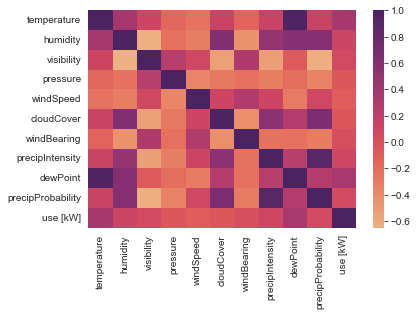

In [202]:
import seaborn as sb
sb.heatmap(see_corr,cmap='flare')

This heatmap and pearson correlation show that energy usage has the highest correlation with temperature 

In [203]:
correlation = train[['temperature','use [kW]']]
correlation

,temperature,use [kW]
0,20.527917,65.013592
1,13.631250,32.305336
2,4.268333,31.164468
3,6.788333,45.287782
4,20.712083,36.316643
...,...,...
329,35.175000,27.712850
330,31.409167,30.114004
331,27.717917,26.348404
332,23.255833,20.241298


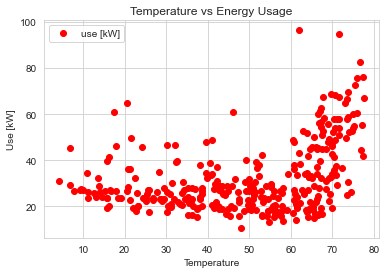

In [204]:
correlation.plot(x = 'temperature' , y = 'use [kW]', style = 'o', color = 'red')
plt.title('Temperature vs Energy Usage')
plt.xlabel('Temperature')
plt.ylabel('Use [kW]')
plt.show()

<AxesSubplot:xlabel='temperature', ylabel='use [kW]'>

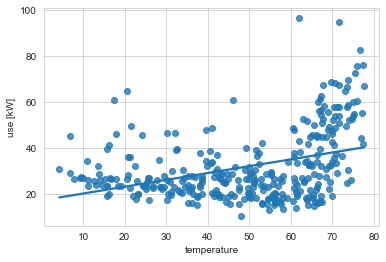

In [205]:
sb.regplot(x = 'temperature' , y = 'use [kW]', fit_reg = True, data = correlation, ci = None)

In [206]:
from sklearn.linear_model import LinearRegression


Creating a linear regression model:

In [207]:
lm = LinearRegression()
lm.fit(correlation['temperature'].values.reshape(-1, 1),correlation['use [kW]'] )

LinearRegression()

In [208]:
predictions = lm.predict(test['temperature'].values.reshape(-1, 1))

Text(0, 0.5, 'Predicted use [kW]')

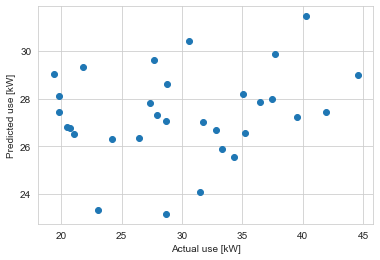

In [209]:
plt.scatter(x = test['use [kW]'], y = predictions)
plt.xlabel('Actual use [kW]')
plt.ylabel('Predicted use [kW]')

In [210]:
from sklearn import metrics
from math import sqrt

print('Root mean squared error:', 
      np.sqrt(metrics.mean_squared_error(test['use [kW]'], predictions)))

Root mean squared error: 7.397553962847898


Since the root mean squared error is quite high, this is not an excellent model to predict daily energy usage. However, due to the restrictions in the instructions and the also keeping in mind that temperature and energy usage correlation coef was only 0.372, this may not be ideal model, but with the instructions and restrictions of simple linear regression, this was the best method. 

In [211]:
date = test[['Date']]
date.reset_index(inplace = True,drop=True)

In [212]:
pred = pd.DataFrame(predictions, columns = ['Predicted Use [kW]'])

In [213]:
dump = pd.merge(date, pred, left_index = True, right_index = True)

In [214]:
dump.to_csv('cse351_hw2_Israni_Krish_113227084_linear_regression', index=False)

In [215]:
train.loc[:,['high']] = np.where(train.loc[:,['temperature']]>= 35, 1, 0) 
train.reset_index(inplace = True,drop=True)

/Users/krishisrani/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [222]:
from sklearn.linear_model import LogisticRegression

In [223]:
lr = LogisticRegression()
lr.fit(train['dewPoint'].values.reshape(-1, 1),train['high'] )

LogisticRegression()

In [224]:
test['high'] = np.where(test['temperature']>= 35, 1, 0) 



/var/folders/71/0wtklwy91_sbdqn9nv18dqhh0000gn/T/ipykernel_6743/3090928318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['high'] = np.where(test['temperature']>= 35, 1, 0)


In [225]:
pred_high_or_low = lr.predict(test['dewPoint'].values.reshape(-1, 1))

dewPoint was used to redict high or low temerature in this case due to the pearson coef and the heatmap used in the last paet, which showed that these two features of weather had the highest correlation. 

In [226]:
metrics.f1_score(y_true = test['high'], y_pred = pred_high_or_low)

0.7647058823529412

In [227]:
pred_high = pd.DataFrame(pred_high_or_low, columns = ['Predicted High or Low Temp'])
dump = pd.merge(date, pred_high, left_index = True, right_index = True)

In [228]:
dump.to_csv('cse351_hw2_Israni_Krish_113227084_logistic_regression', index=False)

In [229]:
energy_pt5 = pd.read_csv('/Users/krishisrani/Downloads/energy_data.csv')


In [230]:
energy_pt5["Date & Time"] = energy_pt5["Date & Time"].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%H:%M:%S'))


In [265]:
energy_pt5['time'] = np.where((energy_pt5['Date & Time']> '06:00:00') & (energy_pt5['Date & Time']<= '18:00:00'), 1, 0) 

energy_pt5.head()




,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],time
0,00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589,0
1,00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008,0
2,01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928,0
3,01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472,0
4,02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798,0


In [236]:
energy_timeOfDay = energy_pt5.groupby('time').sum().reset_index()
energy_timeOfDay

,time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,0,5899.075679,0.0,5899.075679,1224.580017,830.124896,80.151971,11.941615,168.100432,46.226637,47.675764,499.857238,287.359616,42.442180,466.869826,39.314015,83.103694,622.109307
1,1,5715.020717,0.0,5715.020717,334.678376,674.638459,113.190789,41.794279,109.626541,43.214982,56.551917,306.532270,923.248926,45.251473,473.946966,34.018507,183.853716,666.686918


In [264]:
Day_series = energy_timeOfDay.iloc[1]
Night_series = energy_timeOfDay.iloc[0]


In [238]:
bars = pd.DataFrame({"Day":Day_series,"Night":Night_series})

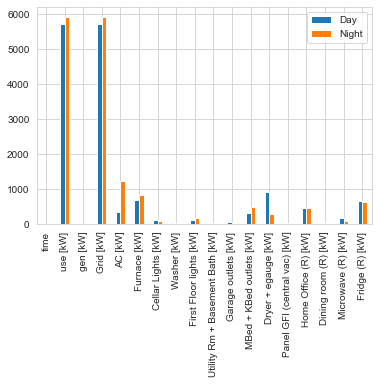

In [239]:
bar_graph = bars.plot(kind='bar')



This bar graph can answer many questions and also presents many trends. For the assignment, one thing that is clearly visible is the difference in energy usage in AC between Day and Night, and that more energy is used at night for air conditioning relative to the day time, The graph shows the total usage during the year. 

In [261]:
filtered = energy_timeOfDay.drop(columns= ['use [kW]', 'gen [kW]', 'Grid [kW]'])



In [268]:
masked = filtered['time'] =  0 
pie = filtered.loc[masked]
pie

time                                  0.000000
AC [kW]                            1224.580017
Furnace [kW]                        830.124896
Cellar Lights [kW]                   80.151971
Washer [kW]                          11.941615
First Floor lights [kW]             168.100432
Utility Rm + Basement Bath [kW]      46.226637
Garage outlets [kW]                  47.675764
MBed + KBed outlets [kW]            499.857238
Dryer + egauge [kW]                 287.359616
Panel GFI (central vac) [kW]         42.442180
Home Office (R) [kW]                466.869826
Dining room (R) [kW]                 39.314015
Microwave (R) [kW]                   83.103694
Fridge (R) [kW]                     622.109307
Name: 0, dtype: float64

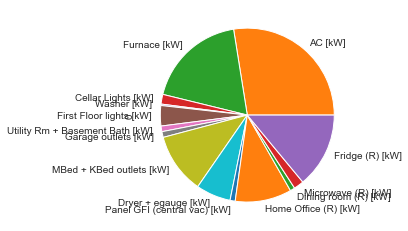

In [269]:
pie_graph = pie.plot(kind='pie')



This pie graph shows that there is a huge consumption of energy in the furnace during the night, and that after AC, it is the second most energy consuming device during the year. Overall, this graph shows how there are a few devices which account for most of the energy consumption at night and most of them have relatively miniscule energy consumption at night during the year. 